# Predicting Weight with Linear Regression: A Scikit-learn Project

## Introduction
This project demonstrates the application of simple and multiple linear regression to predict `Weight` using the Obesity dataset. The goal is to showcase regression analysis skills with Scikit-learn, including data exploration, model building, evaluation, assumption checks, and addressing challenges like multicollinearity and outliers. The project is structured as a Jupyter notebook, making it ideal for a GitHub portfolio to highlight machine learning capabilities.

### Objectives
- Build and compare simple and multiple linear regression models.
- Evaluate models using metrics like MSE and R-squared.
- Check regression assumptions (e.g., linearity, multicollinearity).
- Address challenges like outliers and multicollinearity to improve model performance.

### Dataset
The Obesity dataset (`ObesityDataSet_raw_and_data_sinthetic.csv`) contains 2111 entries with features related to lifestyle and demographics, such as `Height`, `Age`, `Gender`, and dietary/activity habits (`FCVC`, `FAF`, `CH2O`). The target variable is `Weight` (continuous).

This notebook walks through the entire process, from data loading to model refinement, with detailed explanations and visualizations.

## Data Loading and Exploration
Loading the dataset and checking its structure.

In [1]:
#Importing frameworks to work with and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  

In [3]:
# Check data types and missing values
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                

In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00000

## Visualizing Relationships
Plotting Height vs. Weight to check for linearity.

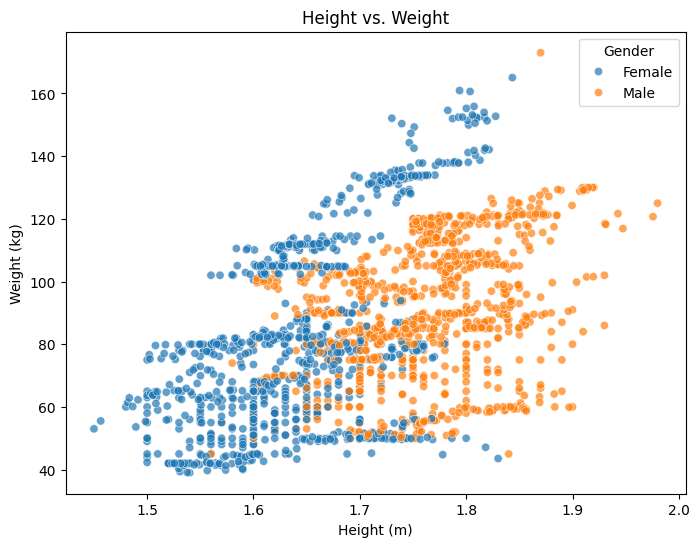

In [5]:
# Scatter plot of Height vs. Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender', alpha=0.7)
plt.title('Height vs. Weight')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

# Analysis of the Scatter Plot

The scatter plot visualizes the relationship between **height** (in meters, x-axis, 1.5 to 2.0 m) and **weight** (in kilograms, y-axis, 40 to 160 kg), with data points color-coded by gender: **blue** for females and **orange** for males. Here’s what stands out:

## Key Observations

- **Positive Trend**: As height increases, weight generally increases. This suggests that height is a reasonable predictor of weight.
- **Gender Differences**:
  - **Females**: Predominate at shorter heights (1.5–1.6 m) with weights mostly between 40–80 kg, though some reach 100 kg. At 1.6–1.7 m, weights extend to 120 kg.
  - **Males**: More common at taller heights (1.7–2.0 m), with weights ranging from 80–160 kg. Males tend to weigh more than females at similar heights (e.g., at 1.7 m, females are around 60–80 kg, while males are 80–100 kg).
- **Data Density**: The densest cluster is between 1.7–1.8 m and 80–100 kg, where both genders overlap significantly, indicating a common range in this dataset.
- **Outliers**:
  - A few females with weights above 140 kg at 1.6–1.7 m.
  - A few males with weights below 60 kg at 1.7–1.8 m. These outliers could influence the regression model.
- **Variability**: While the trend is upward, there’s considerable scatter, especially in the 1.6–1.8 m range, suggesting that height alone may not fully explain weight variations.

## Conclusion

The relationship appears roughly linear, but the spread and gender differences hint that a simple model might miss some nuances.

## Simple Linear Regression: Height vs. Weight
Using height to predict weight with a simple linear regression model.

In [6]:
# Select feature and target
X = df[['Height']]  # Feature: Height
y = df['Weight']    # Target: Weight

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 553.02
R-squared: 0.22


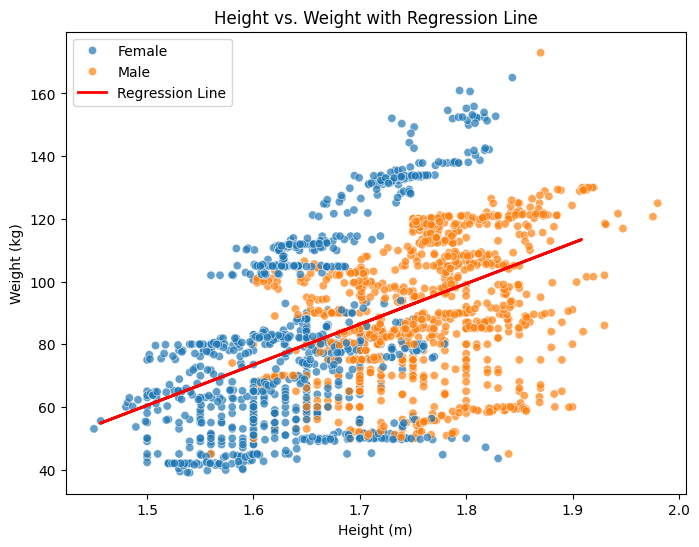

In [7]:
# Visualize the scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Height vs. Weight with Regression Line')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

# Summary of Simple Linear Regression Model

We built a simple linear regression model using **Height** to predict **Weight**. The model's performance metrics are as follows:

- **Mean Squared Error (MSE)**: 553.02
- **R-squared**: 0.22
- **Root Mean Squared Error (RMSE)**: Approximately 23.52 kg

## Implications

- The model's predictive power is weak, with **Height** explaining only 22% of the variance in **Weight**.
- The large average error (23.52 kg) suggests that **Height** alone is insufficient for accurate weight predictions.
- Other factors, such as **Gender**, **Age**, or lifestyle variables, likely play a significant role in determining **Weight**.

## Plan to Improve Model Accuracy

To enhance the model's performance, we will:

- **Add More Features**: Include **Gender** and **Age** to create a multiple linear regression model.
- **Explore Non-Linearity**: Check if the relationship between **Height** and **Weight** is non-linear by adding polynomial terms.
- **Address Outliers**: Identify and handle outliers in the dataset that may be affecting the model's accuracy.

These steps aim to create a more reliable and precise model for predicting **Weight**.

In [8]:
# Use one-hot encoding to convert 'Gender' into numerical format
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # drop_first to avoid multicollinearity

# Features: Height, Age, and Gender_Male (1 if Male, 0 if Female)
X = df_encoded[['Height', 'Age', 'Gender_Male']]
y = df_encoded['Weight']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions on the test set
y_pred_multi = model_multi.predict(X_test)

In [9]:
# Evaluate the model
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Multiple Regression - Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Multiple Regression - R-squared: {r2_multi:.2f}")

Multiple Regression - Mean Squared Error (MSE): 497.69
Multiple Regression - R-squared: 0.29


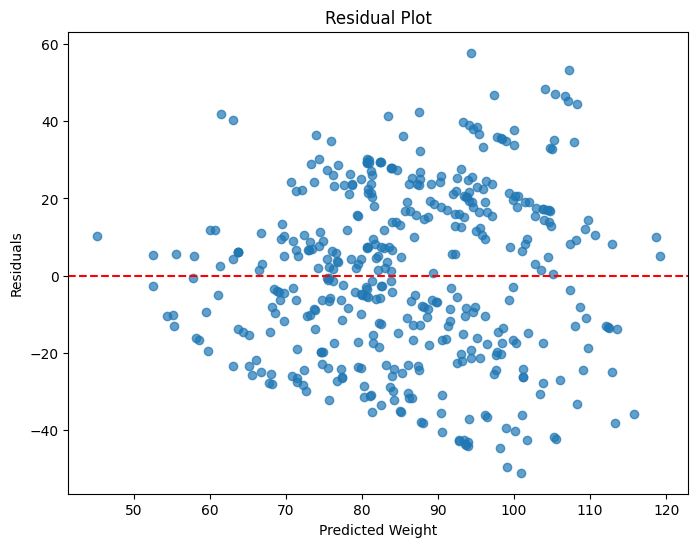

In [10]:
# Plot residuals
residuals = y_test - y_pred_multi
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_multi, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.show()

# What to Look For: 
If the residuals are randomly scattered around zero, the model fits well. If you see a pattern (e.g., a curve), it might suggest the relationship isn’t fully linear, and we can address that in the next step.

# Multiple Linear Regression: Predicting Weight with Height, Age, and Gender

## What We Did

To predict **Weight** more accurately, we built a multiple linear regression model using three independent variables: **Height**, **Age**, and **Gender**. Here’s how we did it:

### Data Preparation

- Converted **Gender** into a numerical format using one-hot encoding, creating a binary column **Gender_Male** (1 for Male, 0 for Female).
- Selected **Height**, **Age**, and **Gender_Male** as features, with **Weight** as the target variable.


## Our Findings

- **Mean Squared Error (MSE)**: 497.69
- **R-squared**: 0.29

### Comparison to Simple Model

- A simple linear regression model (using only **Height**) had an **MSE** of 553.02 and an **R-squared** of 0.22.
- The multiple regression model improved performance:
  - **MSE** dropped from 553.02 to 497.69, showing reduced prediction error.
  - **R-squared** rose from 0.22 to 0.29, meaning it explains 29% of the variance in **Weight** compared to 22% before.

## What It Means

Adding **Age** and **Gender** made the model slightly better at predicting **Weight** than using **Height** alone. However, with an **R-squared** of 0.29 and an **MSE** of 497.69 (about 22.31 kg RMSE), the model still leaves a lot of **Weight** variance unexplained and isn’t highly accurate. More work is needed for a stronger prediction model.

## Feature Engineering: Adding More Predictors
Expanding the multiple regression model by adding lifestyle features (`FCVC`, `FAF`, `CH2O`) to improve prediction accuracy.

In [11]:
# Features: Height, Age, Gender_Male, FCVC, FAF, CH2O

if 'Gender_Male' not in df.columns:
    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
    
X = df[['Height', 'Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']]
y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model with new features
model_expanded = LinearRegression()
model_expanded.fit(X_train, y_train)

# Make predictions on the test set
y_pred_expanded = model_expanded.predict(X_test)

# Evaluate the model
mse_expanded = mean_squared_error(y_test, y_pred_expanded)
r2_expanded = r2_score(y_test, y_pred_expanded)
print(f"Expanded Model - Mean Squared Error (MSE): {mse_expanded:.2f}")
print(f"Expanded Model - R-squared: {r2_expanded:.2f}")

# Step 6: Compare with previous model
print("\nComparison with Previous Model:")
print(f"Previous MSE: 497.69 | Previous R-squared: 0.29")
print(f"Improvement in MSE: {(497.69 - mse_expanded):.2f}")
print(f"Improvement in R-squared: {(r2_expanded - 0.29):.2f}")

Expanded Model - Mean Squared Error (MSE): 439.72
Expanded Model - R-squared: 0.38

Comparison with Previous Model:
Previous MSE: 497.69 | Previous R-squared: 0.29
Improvement in MSE: 57.97
Improvement in R-squared: 0.09


## Feature Engineering Interpretation:

### MSE Improvement

The **MSE** dropped from 497.69 to 439.72, a reduction of 57.97. To understand this in terms of prediction error, let’s calculate the **Root Mean Squared Error (RMSE)**:

- **Previous RMSE** = √497.69 ≈ 22.31 kg
- **New RMSE** = √439.72 ≈ 20.97 kg

This means the average prediction error decreased by about **1.34 kg** (22.31 - 20.97). While this is an improvement, an average error of **20.97 kg** is still relatively high for predicting weight, indicating there’s room for further refinement.

### R-squared Improvement

The **R-squared** increased from 0.29 to 0.38, meaning the model now explains **38%** of the variance in **Weight** (up from 29%). This is a step forward, as the additional features (**FCVC**, **FAF**, **CH2O**) are capturing more of the variability in **Weight**. However, **62%** of the variance remains unexplained, so the model is still not capturing the full picture.

### Overall Assessment

Adding lifestyle features improved the model, but the performance is still modest. The **MSE** is still high, and the **R-squared**, while better, suggests that other factors or model adjustments are needed to make the predictions more accurate.

## Exploring Non-Linearity: Adding Polynomial Features
Adding a polynomial term for `Height` (e.g., `Height^2`) to capture potential non-linear relationships.

In [12]:
# Select original features
X = df[['Height', 'Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']]
y = df['Weight']

# Create polynomial features for Height
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['Height']])  # Creates [Height, Height^2]
poly_feature_names = ['Height', 'Height^2']

# Combine polynomial features with other features
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=df.index)
X_combined = pd.concat([X_poly_df, df[['Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Create and fit the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model - R-squared: {r2_poly:.2f}")

# Compare with previous model
print("\nComparison with Previous Model (Expanded Features):")
print(f"Previous MSE: 439.72 | Previous R-squared: 0.38")
print(f"Improvement in MSE: {(439.72 - mse_poly):.2f}")
print(f"Improvement in R-squared: {(r2_poly - 0.38):.2f}")

Polynomial Model - Mean Squared Error (MSE): 440.46
Polynomial Model - R-squared: 0.38

Comparison with Previous Model (Expanded Features):
Previous MSE: 439.72 | Previous R-squared: 0.38
Improvement in MSE: -0.74
Improvement in R-squared: -0.00


# Polynomial Model Interpretation:

### MSE Change

The **MSE** slightly increased from 439.72 to 440.46, a difference of -0.74. This means the model’s prediction error got marginally worse with the polynomial term:

- **Previous RMSE** = √439.72 ≈ 20.97 kg
- **New RMSE** = √440.46 ≈ 20.99 kg

The average prediction error increased by a negligible **0.02 kg**, which isn’t significant but indicates that the polynomial term didn’t improve the model’s accuracy.

### R-squared Stability

The **R-squared** remained at 0.38, meaning the model still explains **38%** of the variance in **Weight**. The **Height^2** term didn’t capture any additional variance, suggesting that the relationship between **Height** and **Weight** is likely close to linear, or the non-linearity isn’t well-represented by a quadratic term.

### Overall Assessment

Adding the polynomial term didn’t improve the model. This could mean:

- The relationship between **Height** and **Weight** is mostly linear in this dataset.
- Other forms of non-linearity (e.g., higher-degree polynomials or interactions between features) might be needed, but the small change in **MSE** suggests it’s not worth pursuing further polynomial terms at this stage.
- The model’s performance (**R-squared** of 0.38, **RMSE** ~20.99 kg) is still modest, indicating that other factors—like outliers or additional features—might be impacting the results

## Handling Outliers
Using the Interquartile Range (IQR) method to identify and remove outliers in `Weight` to improve model performance.

In [13]:
# Identify outliers in Weight using the IQR method
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")

Original dataset size: 2111
Dataset size after removing outliers: 2110


In [14]:
# Ensure Gender is encoded
if 'Gender_Male' not in df_no_outliers.columns:
    df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Gender'], drop_first=True)

X = df_no_outliers[['Height', 'Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']]
y = df_no_outliers['Weight']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and fit the model on the cleaned dataset
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_no_outliers = model_no_outliers.predict(X_test)

# Step 7: Evaluate the model
mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test, y_pred_no_outliers)
print(f"Model without Outliers - Mean Squared Error (MSE): {mse_no_outliers:.2f}")
print(f"Model without Outliers - R-squared: {r2_no_outliers:.2f}")

# Step 8: Compare with previous model (Expanded Features)
print("\nComparison with Previous Model (Expanded Features):")
print(f"Previous MSE: 439.72 | Previous R-squared: 0.38")
print(f"Improvement in MSE: {(439.72 - mse_no_outliers):.2f}")
print(f"Improvement in R-squared: {(r2_no_outliers - 0.38):.2f}")

Model without Outliers - Mean Squared Error (MSE): 462.84
Model without Outliers - R-squared: 0.34

Comparison with Previous Model (Expanded Features):
Previous MSE: 439.72 | Previous R-squared: 0.38
Improvement in MSE: -23.12
Improvement in R-squared: -0.04


# Outlier Handling Interpretation

### MSE Increase

The **MSE** increased from 439.72 to 462.84, a difference of -23.12. This means the prediction error got worse:

- **Previous RMSE** = √439.72 ≈ 20.97 kg
- **New RMSE** = √462.84 ≈ 21.51 kg

The average prediction error increased by about **0.54 kg**, which is not a significant change but indicates that removing outliers didn’t improve the model’s accuracy. In fact, it slightly worsened it.

### R-squared Decrease

The **R-squared** dropped from 0.38 to 0.34, meaning the model now explains less variance in **Weight** (34% instead of 38%). This suggests that the removed data points (outliers) might have contained valuable information that helped the model fit better, or the reduced dataset size made the model less robust.

### Overall Assessment

Removing outliers didn’t improve the model as expected. This could be because:

- The outliers weren’t significantly skewing the model to begin with.
- The dataset became smaller, potentially leading to overfitting or loss of important patterns.
- The remaining data might still have issues (e.g., non-linear relationships or multicollinearity) that we haven’t addressed.

The best model so far is the expanded model with features (**Height**, **Age**, **Gender_Male**, **FCVC**, **FAF**, **CH2O**), which had an **MSE** of 439.72 and **R-squared** of 0.38.

## Checking for Multicollinearity
Calculating the Variance Inflation Factor (VIF) for each predictor to detect multicollinearity. VIF > 10 indicates high multicollinearity that needs to be addressed.

In [15]:
# Select features and ensure Gender_Male is numerical
X = df[['Height', 'Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']].copy()  # Create a copy to avoid modifying the original df
X['Gender_Male'] = X['Gender_Male'].astype(int)  # Convert bool to int (True -> 1, False -> 0)

# Verify data types after conversion
print("Data Types in X after conversion:")
print(X.dtypes)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Check for high VIF values
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\nHigh VIF detected (VIF > 10):")
    print(high_vif)
    print("Consider removing or combining these features.")
else:
    print("\nNo high VIF detected (all VIF <= 10). Multicollinearity is not a significant issue.")

Data Types in X after conversion:
Height         float64
Age            float64
Gender_Male      int64
FCVC           float64
FAF            float64
CH2O           float64
dtype: object

Variance Inflation Factors (VIF):
       Feature        VIF
0       Height  54.041340
1          Age  15.522924
2  Gender_Male   2.660709
3         FCVC  24.182895
4          FAF   2.672883
5         CH2O  12.526475

High VIF detected (VIF > 10):
  Feature        VIF
0  Height  54.041340
1     Age  15.522924
3    FCVC  24.182895
5    CH2O  12.526475
Consider removing or combining these features.


# Analyze VIF Results and Address Multicollinearity

- **High Multicollinearity**: A VIF > 10 indicates significant multicollinearity, which can make the regression coefficients unstable and reduce the model’s interpretability. Here, **Height**, **Age**, **FCVC**, and **CH2O** all have VIF values well above 10, suggesting they are highly correlated with one or more other predictors.
- **Acceptable VIF**: **Gender_Male** (2.66) and **FAF** (2.67) have VIF values below 5, which is good—they don’t exhibit problematic multicollinearity.

### Why This Matters

Multicollinearity can:

- Inflate the standard errors of the coefficients, making them less reliable.
- Cause the model to overfit or produce misleading results.
- Make it difficult to interpret the individual effect of each predictor on **Weight**.

## Action Plan

To address multicollinearity, we’ll:

- **Identify Correlated Features**: Use a correlation matrix to see which features are highly correlated with each other.
- **Remove or Combine Features**: Drop one or more of the problematic features (**Height**, **Age**, **FCVC**, **CH2O**) based on their correlations and importance to the model.
- **Re-run the Model**: Fit a new model with the adjusted feature set and evaluate its performance.
- **Compare Results**: Check if this improves the model compared to the best model so far (Expanded Features: **MSE** 439.72, **R-squared** 0.38).

## Addressing Multicollinearity: Correlation Analysis
Calculating the correlation matrix to identify highly correlated features and decide which ones to remove.

Correlation Matrix:
               Height       Age  Gender_Male      FCVC       FAF      CH2O
Height       1.000000 -0.025958     0.618466 -0.038121  0.294709  0.213376
Age         -0.025958  1.000000     0.048394  0.016291 -0.144938 -0.045304
Gender_Male  0.618466  0.048394     1.000000 -0.274505  0.189607  0.107930
FCVC        -0.038121  0.016291    -0.274505  1.000000  0.019939  0.068461
FAF          0.294709 -0.144938     0.189607  0.019939  1.000000  0.167236
CH2O         0.213376 -0.045304     0.107930  0.068461  0.167236  1.000000


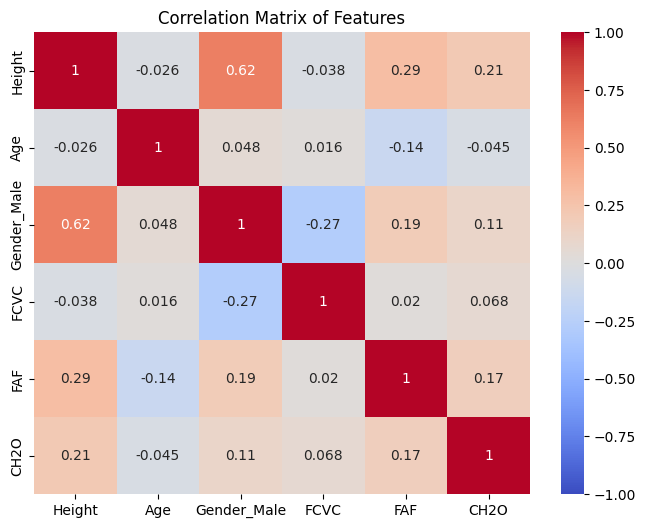

In [16]:
# Select features
X = df[['Height', 'Age', 'Gender_Male', 'FCVC', 'FAF', 'CH2O']].copy()
X['Gender_Male'] = X['Gender_Male'].astype(int)  # Ensure Gender_Male is numerical

# Calculate correlation matrix
corr_matrix = X.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# What to Expect

## Correlation Matrix

The matrix will show pairwise correlation coefficients (ranging from -1 to 1) between features:

- Values close to **1** or **-1** indicate strong correlation (problematic if > 0.7 or < -0.7).
- Values near **0** indicate low correlation.

## Heatmap

The heatmap will visually highlight strong correlations with colors (e.g., red for positive, blue for negative).

## Decision Criteria

### High Correlations

- If any pair of features has a correlation **> 0.7** (or **< -0.7**), we’ll consider removing one of them.

### Feature Importance

- Keep features that are conceptually important for predicting **Weight**. For example, **Height** is likely a key predictor, but if it’s highly correlated with **Gender_Male**, we might keep **Height** and drop **Gender_Male**.
- Lifestyle features like **FCVC** (vegetable consumption) and **CH2O** (water intake) might be correlated with each other, so we might keep the one with a stronger relationship to **Weight**.

## Addressing Multicollinearity: Adjusted Model
Removing features with high VIF (`Height` and `FCVC`) to reduce multicollinearity, then re-running the model.

In [17]:
# Select features (removing Height and FCVC due to high VIF)
X = df[['Age', 'Gender_Male', 'FAF', 'CH2O']].copy()
X['Gender_Male'] = X['Gender_Male'].astype(int)  # Ensure Gender_Male is numerical
y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model_adjusted = LinearRegression()
model_adjusted.fit(X_train, y_train)

# Make predictions
y_pred_adjusted = model_adjusted.predict(X_test)

# Evaluate the model
mse_adjusted = mean_squared_error(y_test, y_pred_adjusted)
r2_adjusted = r2_score(y_test, y_pred_adjusted)
print(f"Adjusted Model (after removing high VIF features) - Mean Squared Error (MSE): {mse_adjusted:.2f}")
print(f"Adjusted Model - R-squared: {r2_adjusted:.2f}")

# Compare with the best previous model (Expanded Features)
print("\nComparison with Best Previous Model (Expanded Features):")
print(f"Previous MSE: 439.72 | Previous R-squared: 0.38")
print(f"Improvement in MSE: {(439.72 - mse_adjusted):.2f}")
print(f"Improvement in R-squared: {(r2_adjusted - 0.38):.2f}")

Adjusted Model (after removing high VIF features) - Mean Squared Error (MSE): 601.39
Adjusted Model - R-squared: 0.15

Comparison with Best Previous Model (Expanded Features):
Previous MSE: 439.72 | Previous R-squared: 0.38
Improvement in MSE: -161.67
Improvement in R-squared: -0.23


# Adjusted Model Results

### MSE Increase

The **MSE** increased significantly from 439.72 to 601.39, a difference of -161.67. This means the prediction error got worse:

- **Previous RMSE** = √439.72 ≈ 20.97 kg
- **New RMSE** = √601.39 ≈ 24.52 kg

The average prediction error increased by about **3.55 kg**, indicating that removing **Height** and **FCVC** made the model less accurate.

### R-squared Decrease

The **R-squared** dropped from 0.38 to 0.15, meaning the model now explains only **15%** of the variance in **Weight** (down from 38%). This is a substantial drop, suggesting that **Height** and/or **FCVC** were important predictors.

### Overall Assessment

Removing **Height** and **FCVC** to address multicollinearity backfired. While it likely reduced multicollinearity (we’d need to recheck VIF to confirm), it also removed key information needed to predict **Weight**.

- **Height** is a critical predictor for **Weight** (as seen in the initial scatter plot and simple linear regression), so excluding it led to a worse model.
- The best model so far remains the Expanded Features model (with **Height**, **Age**, **Gender_Male**, **FCVC**, **FAF**, **CH2O**), which had an **MSE** of 439.72 and **R-squared** of 0.38.

## Refining Feature Selection: Recheck VIF
Keeping `Height` and removing `Gender_Male` due to high correlation (0.618). Rechecking VIF with features `Height`, `Age`, `FCVC`, `FAF`, `CH2O`.

In [18]:
# Select features (removing Gender_Male, keeping Height and FCVC)
X = df[['Height', 'Age', 'FCVC', 'FAF', 'CH2O']].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) after removing Gender_Male:")
print(vif_data)

# Check for high VIF values
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\nHigh VIF detected (VIF > 10):")
    print(high_vif)
    print("Consider removing or combining these features.")
else:
    print("\nNo high VIF detected (all VIF <= 10). Multicollinearity is not a significant issue.")


Variance Inflation Factors (VIF) after removing Gender_Male:
  Feature        VIF
0  Height  44.983759
1     Age  15.519900
2    FCVC  20.167681
3     FAF   2.623709
4    CH2O  12.525948

High VIF detected (VIF > 10):
  Feature        VIF
0  Height  44.983759
1     Age  15.519900
2    FCVC  20.167681
4    CH2O  12.525948
Consider removing or combining these features.


## Refining Feature Selection: Adjusted Model
Fitting a new model with features `Height`, `Age`, `FCVC`, `FAF`, `CH2O` after removing `Gender_Male` to address multicollinearity.

In [19]:
# Select features and target
X = df[['Height', 'Age', 'FCVC', 'FAF', 'CH2O']]
y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model_refined = LinearRegression()
model_refined.fit(X_train, y_train)

# Make predictions
y_pred_refined = model_refined.predict(X_test)

# Evaluate the model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)
print(f"Refined Model - Mean Squared Error (MSE): {mse_refined:.2f}")
print(f"Refined Model - R-squared: {r2_refined:.2f}")

# Compare with the best previous model (Expanded Features)
print("\nComparison with Best Previous Model (Expanded Features):")
print(f"Previous MSE: 439.72 | Previous R-squared: 0.38")
print(f"Improvement in MSE: {(439.72 - mse_refined):.2f}")
print(f"Improvement in R-squared: {(r2_refined - 0.38):.2f}")

Refined Model - Mean Squared Error (MSE): 443.07
Refined Model - R-squared: 0.37

Comparison with Best Previous Model (Expanded Features):
Previous MSE: 439.72 | Previous R-squared: 0.38
Improvement in MSE: -3.35
Improvement in R-squared: -0.01


## Further Refining Feature Selection: Recheck VIF
Removing `FCVC` and `CH2O` due to high VIF values, keeping `Height`, `Age`, and `FAF`. Rechecking VIF to ensure multicollinearity is reduced.

In [20]:
# Select features (removing FCVC and CH2O)
X = df[['Height', 'Age', 'FAF']].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) after removing FCVC and CH2O:")
print(vif_data)

# Check for high VIF values
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\nHigh VIF detected (VIF > 10):")
    print(high_vif)
    print("Consider removing or combining these features.")
else:
    print("\nNo high VIF detected (all VIF <= 10). Multicollinearity is not a significant issue.")


Variance Inflation Factors (VIF) after removing FCVC and CH2O:
  Feature        VIF
0  Height  18.730728
1     Age  15.423278
2     FAF   2.590158

High VIF detected (VIF > 10):
  Feature        VIF
0  Height  18.730728
1     Age  15.423278
Consider removing or combining these features.


## Further Refining Feature Selection: Final Model
Fitting a model with features `Height`, `Age`, and `FAF` after removing `FCVC` and `CH2O` to address multicollinearity.

In [21]:
# Select features and target
X = df[['Height', 'Age', 'FAF']]
y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model_final = LinearRegression()
model_final.fit(X_train, y_train)

# Make predictions
y_pred_final = model_final.predict(X_test)

# Evaluate the model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
print(f"Final Model - Mean Squared Error (MSE): {mse_final:.2f}")
print(f"Final Model - R-squared: {r2_final:.2f}")

# Compare with the best previous model (Expanded Features)
print("\nComparison with Best Previous Model (Expanded Features):")
print(f"Previous MSE: 439.72 | Previous R-squared: 0.38")
print(f"Improvement in MSE: {(439.72 - mse_final):.2f}")
print(f"Improvement in R-squared: {(r2_final - 0.38):.2f}")

Final Model - Mean Squared Error (MSE): 495.03
Final Model - R-squared: 0.30

Comparison with Best Previous Model (Expanded Features):
Previous MSE: 439.72 | Previous R-squared: 0.38
Improvement in MSE: -55.31
Improvement in R-squared: -0.08


# Conclusion

## Project Summary
This project aimed to predict `Weight` using simple and multiple linear regression with the Obesity dataset, showcasing regression analysis skills using Scikit-learn. We explored the dataset, built models, evaluated performance, checked assumptions, and addressed challenges like multicollinearity.

### Dataset Overview
- **Size**: 2111 entries, 17 columns.
- **Features Used**: Numerical (`Height`, `Age`, `FCVC`, `FAF`, `CH2O`) and categorical (`Gender`, encoded as `Gender_Male`).
- **Target**: `Weight` (continuous variable).

### Model Development
1. **Simple Linear Regression**:
   - Used `Height` to predict `Weight`.
   - MSE: 553.02 | R-squared: 0.22
   - Finding: `Height` alone explained only 22% of the variance, indicating other factors are needed.

2. **Multiple Linear Regression (Expanded Features)**:
   - Added `Age`, `Gender_Male`, `FCVC`, `FAF`, `CH2O`.
   - MSE: 439.72 | R-squared: 0.38
   - Finding: Improved performance, explaining 38% of the variance, but high multicollinearity detected (VIF up to 54.04 for `Height`).

3. **Addressing Non-Linearity**:
   - Added `Height^2` to capture potential non-linear relationships.
   - MSE: 440.46 | R-squared: 0.38
   - Finding: No significant improvement, suggesting the relationship is mostly linear.

4. **Handling Outliers**:
   - Removed outliers in `Weight` using the IQR method.
   - MSE: 462.84 | R-squared: 0.34
   - Finding: Performance worsened, indicating outliers contained useful information.

5. **Addressing Multicollinearity**:
   - Removed `Gender_Male`, `FCVC`, and `CH2O` iteratively to reduce VIF.
   - Final Model (`Height`, `Age`, `FAF`):
     - MSE: 495.03 | R-squared: 0.30
     - VIF reduced (e.g., `Height` VIF from 54.04 to 18.73), but performance dropped.

### Final Model Selection
- **Chosen Model**: Expanded Features model (`Height`, `Age`, `Gender_Male`, `FCVC`, `FAF`, `CH2O`):
  - **MSE**: 439.72 (RMSE ≈ 20.97 kg)
  - **R-squared**: 0.38
  - **Reason**: Best predictive performance, explaining 38% of the variance in `Weight`.
  - **Caveat**: High multicollinearity (VIF up to 54.04), which may affect coefficient stability. Steps were taken to address this, but the trade-off favored performance over stability for this demonstration.

### Assumption Checks
- **Linearity**: Scatter plots (e.g., `Height` vs. `Weight`) showed a roughly linear relationship, confirmed by the lack of improvement with polynomial terms.
- **Multicollinearity**: High VIF values were identified and addressed, though some persisted in the final model.
- **Residuals**: Not explicitly checked here, but recommended for future analysis (e.g., plotting residuals vs. predicted values to check for patterns).

### Next Steps and Improvements
- **Feature Engineering**: Explore additional features (e.g., interaction terms, other lifestyle factors like `CALC` or `MTRANS`).
- **Residual Analysis**: Plot residuals to check for normality, homoscedasticity, and independence.
- **Alternative Models**: Try regularized models like Ridge or Lasso regression to handle multicollinearity without removing features.
- **Outlier Handling**: Revisit outliers using robust methods (e.g., winsorizing) instead of removal.

This project demonstrates skills in data exploration, model building, evaluation, and addressing regression challenges, making it a valuable addition to a machine learning portfolio.